<a href="https://colab.research.google.com/github/ThiruNithish28/CMS/blob/main/imageclassi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.3
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

In [ ]:
import tensorflow as tf
import os

In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [ ]:
gpus=tf.config.experimental.list_physical_devices('CPU')

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir='foot datasets'

In [ ]:
os.listdir(os.path.join(data_dir,'foot datasets'))

FileNotFoundError: ignored

In [ ]:
image_exts=['jpeg','jpg','bmp','png']

In [ ]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
img=cv2.imread(os.path.join('foot datasets','foot datasets','Screenshot 2023-09-08 190649.png'))

In [ ]:
img.shape

(551, 234, 3)

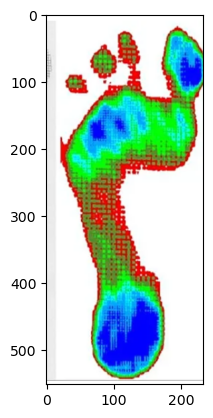

In [ ]:
plt.imshow(img)

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('foot datasets')

Found 257 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

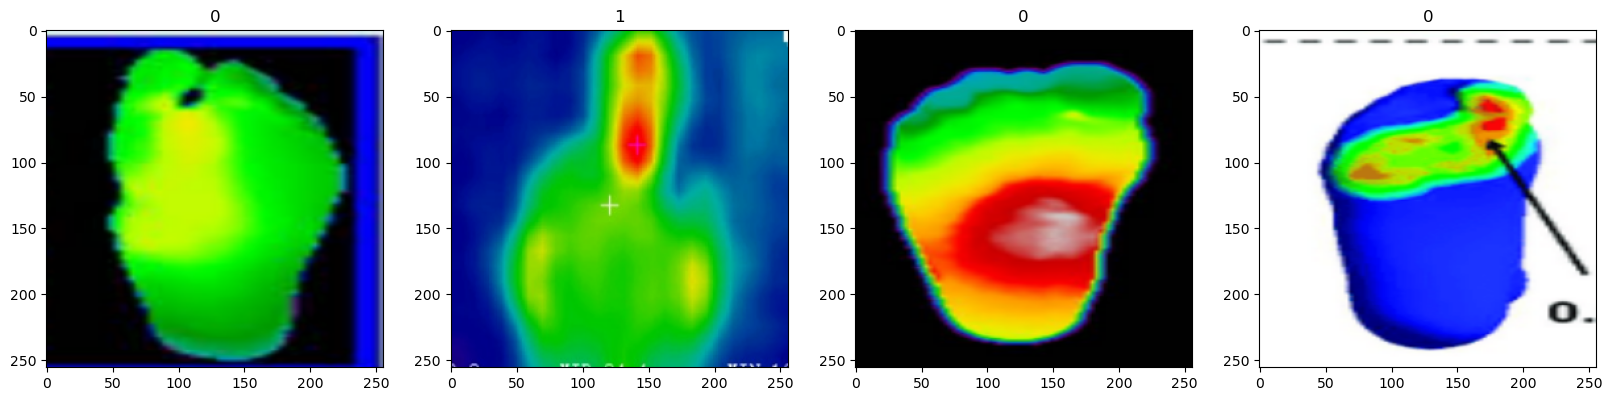

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          ...,
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00]],
 
         [[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          ...,
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00]],
 
         [[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          ...,
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 5s 677ms/step - loss: 0.3194 - accuracy: 0.8125 - val_loss: 0.2609 - val_accuracy: 0.9375
Epoch 2/20
6/6 [==============================] - 4s 640ms/step - loss: 0.0899 - accuracy: 0.9844 - val_loss: 0.2189 - val_accuracy: 0.9688
Epoch 3/20
6/6 [==============================] - 4s 629ms/step - loss: 0.1913 - accuracy: 0.9792 - val_loss: 0.0361 - val_accuracy: 0.9688
Epoch 4/20
6/6 [==============================] - 4s 648ms/step - loss: 0.0639 - accuracy: 0.9844 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 4s 628ms/step - loss: 0.0368 - accuracy: 0.9844 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 4s 640ms/step - loss: 0.0494 - accuracy: 0.9740 - val_loss: 0.0484 - val_accuracy: 0.9688
Epoch 7/20
6/6 [==============================] - 4s 627ms/step - loss: 0.0623 - accuracy: 0.9740 - val_loss: 0.0875 - val_accuracy: 0.9375
Epoch 8/20
6/6 [====

In [ ]:
hist.history

{'loss': [0.31935450434684753,
  0.08987126499414444,
  0.19133366644382477,
  0.06394574046134949,
  0.03680689260363579,
  0.04943360388278961,
  0.06230594590306282,
  0.0274673905223608,
  0.03263871744275093,
  0.04168744757771492,
  0.03330444172024727,
  0.026587413623929024,
  0.01922440715134144,
  0.01622728444635868,
  0.01809157244861126,
  0.017079414799809456,
  0.023396769538521767,
  0.008986704051494598,
  0.015300024300813675,
  0.0210660919547081],
 'accuracy': [0.8125,
  0.984375,
  0.9791666865348816,
  0.984375,
  0.984375,
  0.9739583134651184,
  0.9739583134651184,
  0.9791666865348816,
  0.9791666865348816,
  0.96875,
  0.9739583134651184,
  0.9791666865348816,
  0.9791666865348816,
  0.984375,
  0.9791666865348816,
  0.984375,
  1.0,
  0.9947916865348816,
  0.9947916865348816,
  1.0],
 'val_loss': [0.26093676686286926,
  0.2188934087753296,
  0.036120858043432236,
  0.02431955188512802,
  0.002194703556597233,
  0.04842965304851532,
  0.08751430362462997,
  0.

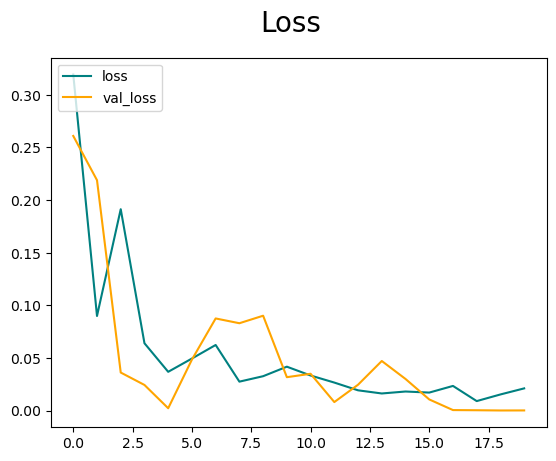

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

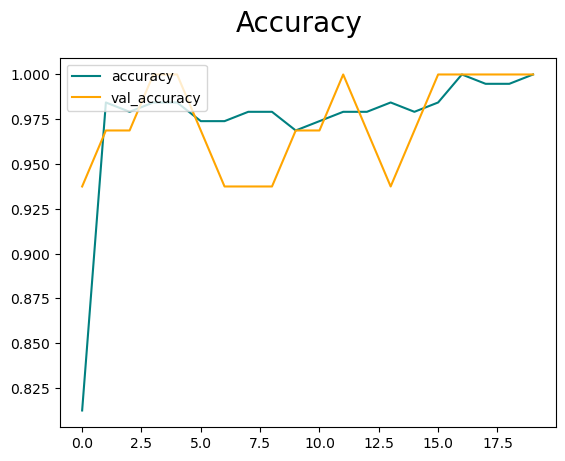

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

0

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'percision:{pre.result().numpy()},Recall:{ re.result().numpy()},Accuracy:{acc.result().numpy}')

percision:0.0,Recall:0.0,Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.0>>


In [ ]:
import cv2

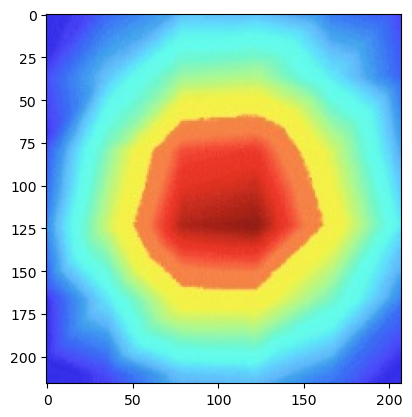

In [ ]:
img = cv2.imread('foottest3.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

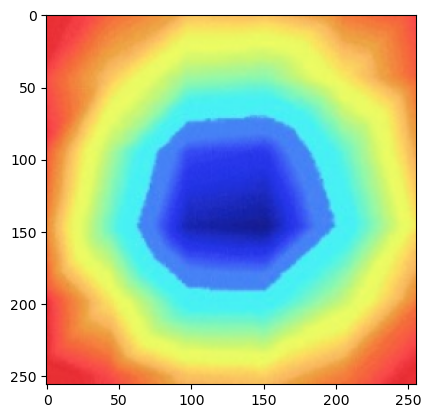

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 69ms/step


In [ ]:
yhat

array([[0.00072511]], dtype=float32)

In [ ]:
if yhat<5.1:
    print(f'predicted class is not human')
else:
    print(f'predicted class is human')

predicted class is not human


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','footprint.h5'))

C:\Users\UDHAIKALA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model(os.path.join('models','footprint.h5'))

In [ ]:
yhatnew=new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 58ms/step


In [ ]:
import cv2

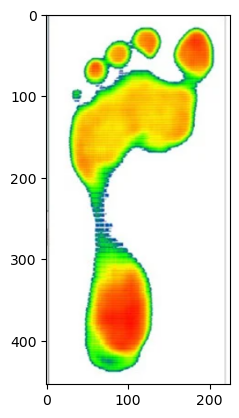

In [ ]:
img = cv2.imread('Screenshot 2023-09-08 190532.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

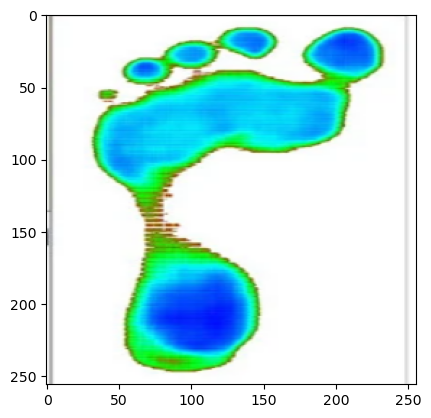

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 16ms/step


In [ ]:
yhat

array([[0.0009833]], dtype=float32)

In [ ]:
if yhat>2:
    print(f'predicted class is not human')
else:
    print(f'predicted class is human')

predicted class is human


In [ ]:
import cv2

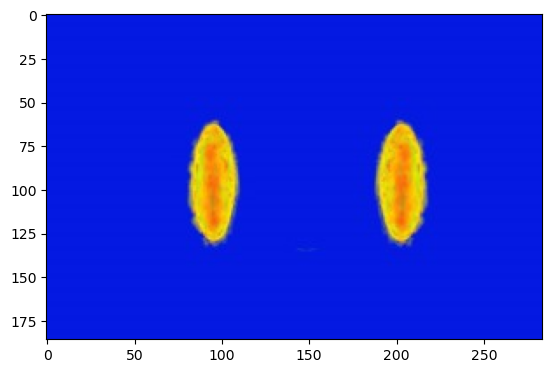

In [ ]:
img = cv2.imread('WhatsApp Image 2023-09-09 at 12.52.30.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

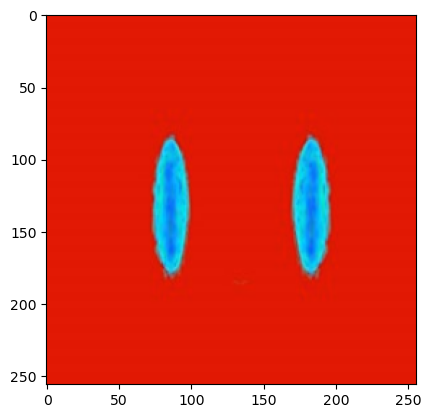

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 21ms/step


In [ ]:
yhat

array([[1.4164231e-08]], dtype=float32)

In [ ]:
if yhat<2:
    print(f'predicted class is not human')
else:
    print(f'predicted class is human')

predicted class is not human


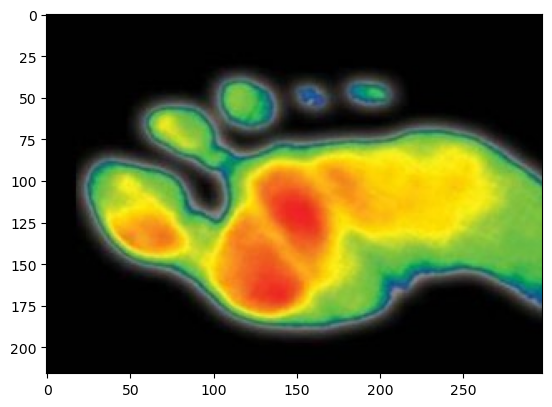

In [ ]:
img = cv2.imread('WhatsApp Image 2023-09-09 at 12.55.14.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

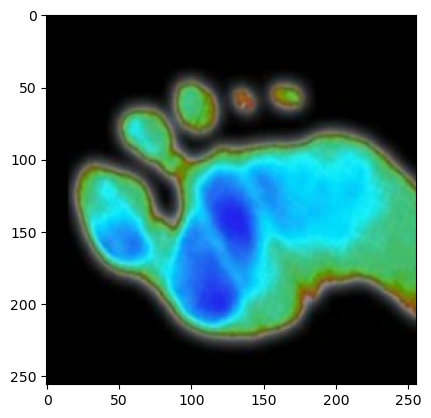

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 23ms/step


In [ ]:
yhat

array([[3.306059e-07]], dtype=float32)

In [ ]:
if yhat>2:
    print(f'predicted class is not human')
else:
    print(f'predicted class is human')

predicted class is human


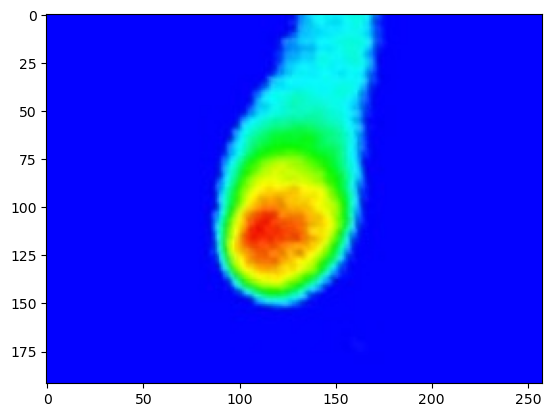

In [ ]:
img = cv2.imread('WhatsApp Image 2023-09-09 at 12.56.14.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

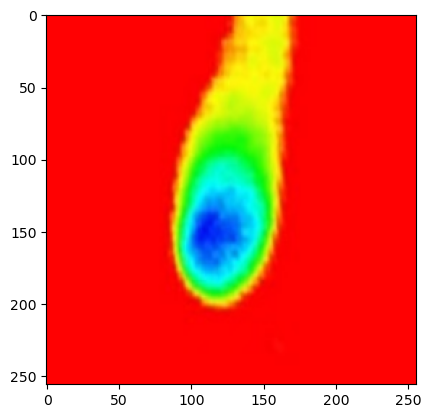

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 18ms/step


In [ ]:
yhat

array([[2.5092288e-11]], dtype=float32)

In [ ]:
if yhat>2:
    print(f'predicted class is not human')
else:
    print(f'predicted class is human')

predicted class is human
